# Aquire & Analyze
#### Megan Albee, Craig Stahlberg, Jamie Robertson
##### Fall 2022

This notebook scrapes data from the eBird application website. App owners report sightings of specific birds, in specific locations, at specific times like other birding checklists as well as length of time looking, survey protocol, and how many birders are in their group. The data available via a free api key goes back 30 days and can be pulled for locations around the world. eBird uses citizen scientist to populate a pretty friendly and accessable database. This notebook uses an api wrapper that is freely available and it helps to extract the location information from eBird encounters.  


In [1]:
# pip install ebird.api
# pip install folium

In [2]:
import requests
import json
import http.client

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import folium 
from folium.plugins import HeatMap 
%matplotlib inline
sns.set()

import requests

In [3]:
#ProjectBabbler shared an api wrapper on github that is very nice
from ebird.api import get_observations
from ebird.api import get_hotspots, get_nearby_hotspots, get_hotspot
from ebird.api import get_nearby_observations
from ebird.api import get_notable_observations, get_nearby_notable, get_species_observations, get_nearby_species
from ebird.api import get_visits, get_checklist
#api keys were easily obtained from eBird and generated automatically after filling out a form
api_key = 'r6c72jomelh2'

The data aquired from eBird will be analyzed using the folium package. Folium provides data visualization functions with variety of mapping features available. For this assignment, several mapping functions will be used to view and interpret the data. Before the data can be mapped, it is pulled from eBird. The last 30 days of records from the State of Montana are collected. 

In [4]:
# get records from the state of Montana
records = get_observations(api_key, 'US-MT', back=30)
len(records)

print(f'There are {len(records)} recorded observations. A number of birds are recorded in each observation')
# this doesn't work - print(f'There are {sum(records.howMany)} birds represented.')

There are 173 recorded observations. A number of birds are recorded in each observation


The records are moved into a database for further analysis. Using the Folium interactve world map and heat map overlay, the number of birds observed are illustrated in the heat map. As observations are continuously reported and the 30-day rolling window marches forward, the map will be updated with current information everytime this notebook is run. 

In [5]:
# put data into df
MT_df =pd.DataFrame.from_dict(records)
MT_df.head(15)

,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,subId,exoticCategory
0,houspa,House Sparrow,Passer domesticus,L12709024,Luikart House (private),2022-12-04 09:46,2,47.620548,-114.057970,True,False,True,S123441523,N
1,norfli,Northern Flicker,Colaptes auratus,L12709024,Luikart House (private),2022-12-04 09:46,1,47.620548,-114.057970,True,False,True,S123441523,NaN
2,daejun,Dark-eyed Junco,Junco hyemalis,L12709024,Luikart House (private),2022-12-04 09:46,10,47.620548,-114.057970,True,False,True,S123441523,NaN
3,houfin,House Finch,Haemorhous mexicanus,L12709024,Luikart House (private),2022-12-04 09:46,5,47.620548,-114.057970,True,False,True,S123441523,NaN
4,sonspa,Song Sparrow,Melospiza melodia,L12709024,Luikart House (private),2022-12-04 09:46,1,47.620548,-114.057970,True,False,True,S123441523,NaN
5,dowwoo,Downy Woodpecker,Dryobates pubescens,L21711462,Bravely Retreat Bird Feeders,2022-12-04 09:14,1,45.662956,-108.690815,True,False,True,S123439281,NaN
6,bkbmag1,Black-billed Magpie,Pica hudsonia,L21711462,Bravely Retreat Bird Feeders,2022-12-04 09:14,1,45.662956,-108.690815,True,False,True,S123439281,NaN
7,shtgro,Sharp-tailed Grouse,Tympanuchus phasianellus,L18051639,"398 Whitmore Rd, Cascade US-MT (47.1892,-111.6...",2022-12-04 08:53,1,47.189166,-111.617516,True,False,True,S123440119,NaN
8,amtspa,American Tree Sparrow,Spizelloides arborea,L21711602,"Glengarry Rd, Lewistown US-MT",2022-12-04 08:53,11,47.037636,-109.545076,True,False,True,S123440246,NaN
9,goleag,Golden Eagle,Aquila chrysaetos,L21711602,"Glengarry Rd, Lewistown US-MT",2022-12-04 08:53,1,47.037636,-109.545076,True,False,True,S123440246,NaN


In [6]:
MT_df = MT_df.drop('exoticCategory',axis=1)

In [7]:
MT_df = MT_df.dropna()
MT_df.head(15)

,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,subId
0,houspa,House Sparrow,Passer domesticus,L12709024,Luikart House (private),2022-12-04 09:46,2,47.620548,-114.057970,True,False,True,S123441523
1,norfli,Northern Flicker,Colaptes auratus,L12709024,Luikart House (private),2022-12-04 09:46,1,47.620548,-114.057970,True,False,True,S123441523
2,daejun,Dark-eyed Junco,Junco hyemalis,L12709024,Luikart House (private),2022-12-04 09:46,10,47.620548,-114.057970,True,False,True,S123441523
3,houfin,House Finch,Haemorhous mexicanus,L12709024,Luikart House (private),2022-12-04 09:46,5,47.620548,-114.057970,True,False,True,S123441523
4,sonspa,Song Sparrow,Melospiza melodia,L12709024,Luikart House (private),2022-12-04 09:46,1,47.620548,-114.057970,True,False,True,S123441523
5,dowwoo,Downy Woodpecker,Dryobates pubescens,L21711462,Bravely Retreat Bird Feeders,2022-12-04 09:14,1,45.662956,-108.690815,True,False,True,S123439281
6,bkbmag1,Black-billed Magpie,Pica hudsonia,L21711462,Bravely Retreat Bird Feeders,2022-12-04 09:14,1,45.662956,-108.690815,True,False,True,S123439281
7,shtgro,Sharp-tailed Grouse,Tympanuchus phasianellus,L18051639,"398 Whitmore Rd, Cascade US-MT (47.1892,-111.6...",2022-12-04 08:53,1,47.189166,-111.617516,True,False,True,S123440119
8,amtspa,American Tree Sparrow,Spizelloides arborea,L21711602,"Glengarry Rd, Lewistown US-MT",2022-12-04 08:53,11,47.037636,-109.545076,True,False,True,S123440246
9,goleag,Golden Eagle,Aquila chrysaetos,L21711602,"Glengarry Rd, Lewistown US-MT",2022-12-04 08:53,1,47.037636,-109.545076,True,False,True,S123440246


In [8]:
#Okay but now we want to see where the birds are
#A heat map easily tells us the density of birds. 

birds = zip(MT_df['lat'], MT_df['lng'], MT_df['howMany'])
list_of_zip = list(birds)
list_of_zip[0:10] 

[(47.6205475, -114.0579697, 2),
 (47.6205475, -114.0579697, 1),
 (47.6205475, -114.0579697, 10),
 (47.6205475, -114.0579697, 5),
 (47.6205475, -114.0579697, 1),
 (45.662956, -108.690815, 1),
 (45.662956, -108.690815, 1),
 (47.189166, -111.617516, 1),
 (47.037636, -109.545076, 11),
 (47.037636, -109.545076, 1)]

In [9]:
birds

In [10]:
#blank interactive world map
folium_map = folium.Map()
#folium_map

#we want the map to open up in Montana
helena = [46.58976, -111.0212] #lat,long
folium_map = folium.Map(location=helena, zoom_start = 6.5, titles = "OpenStreetMap")
#folium_map

In [11]:
#add location information to heatmap layer
hm_layer = HeatMap(list_of_zip,
                   radius = 8)
folium_map.add_child(hm_layer)

Now let's say that this report is run for birders who live around the University of Montana in Missoula. It is assumed that this community is interested in birding hotspots with 80 miles of the University. The following map provides a parachute marker on the Univeristy and circular marker to distinguish bird sightings within the acceptable range. 

In [12]:
# Circular marker 
folium.CircleMarker(location = [46.86003, -113.98378], radius = 80, popup = 'My Location').add_to(folium_map)

# Parachute markers and add a line between two locations
folium.Marker([46.86003, -113.98378], popup = 'University of Montana').add_to(folium_map)
#folium.Marker([24.7077, 66.0501], popup = 'Location 2').add_to(folium_map)
#folium.PolyLine(locations = [(24.860966, 66.990501), (24.7077, 66.0501)], line_opacity = 0.5).add_to(folium_map)
folium_map

What if we were concerned more about the types of birds, rather than the location? Folium visualizations also include bar graphs. The bar graph below shows the 10 most highly reported bird species in Montana based on the eBird data. 

In [13]:
MT_df.query("comName=='Canada Goose'")

,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,subId
37,cangoo,Canada Goose,Branta canadensis,L1392667,Wiley Dike Rd and Slough,2022-12-03 15:58,35,48.120407,-114.228502,True,False,False,S123407542


In [14]:
## Group by common name and sum the number observed
bird_groups = MT_df.groupby('comName').howMany.sum().reset_index()


bird_tops = bird_groups.nlargest(10, 'howMany')
bird_tops

,comName,howMany
130,Ring-billed Gull,125
95,Mallard,84
141,Sandhill Crane,75
63,Gadwall,56
147,Snow Goose,50
79,Herring Gull,45
34,Canada Goose,35
119,Pinyon Jay,30
59,European Starling,26
72,Greater Scaup,25


In [15]:
MT_tops = MT_df.nlargest(10, 'howMany')
MT_tops

,speciesCode,comName,sciName,locId,locName,obsDt,howMany,lat,lng,obsValid,obsReviewed,locationPrivate,subId
67,ribgul,Ring-billed Gull,Larus delawarensis,L1299713,Flathead County Landfill,2022-12-03 12:15,125,48.310601,-114.345016,True,False,False,S123395323
14,mallar3,Mallard,Anas platyrhynchos,L21711602,"Glengarry Rd, Lewistown US-MT",2022-12-04 08:53,84,47.037636,-109.545076,True,False,True,S123440246
115,sancra,Sandhill Crane,Antigone canadensis,L2226858,778 10 Mile Rd,2022-11-29 10:00,75,47.325007,-111.476641,True,True,True,S123215204
73,gadwal,Gadwall,Mareca strepera,L1435481,Bighorn Canyon NRA--Afterbay Reservoir,2022-12-03 12:03,56,45.313920,-107.927908,True,False,False,S123409585
81,snogoo,Snow Goose,Anser caerulescens,L6484052,Helena Valley Regulating Reservoir--West,2022-12-03 11:30,50,46.638782,-111.883757,True,False,False,S123398015
68,hergul,Herring Gull,Larus argentatus,L1299713,Flathead County Landfill,2022-12-03 12:15,45,48.310601,-114.345016,True,False,False,S123395323
37,cangoo,Canada Goose,Branta canadensis,L1392667,Wiley Dike Rd and Slough,2022-12-03 15:58,35,48.120407,-114.228502,True,False,False,S123407542
126,pinjay,Pinyon Jay,Gymnorhinus cyanocephalus,L2143967,Droulliard FAS,2022-11-26 12:40,30,45.896908,-111.593735,True,False,False,S123141525
19,eursta,European Starling,Sturnus vulgaris,L21711602,"Glengarry Rd, Lewistown US-MT",2022-12-04 08:53,26,47.037636,-109.545076,True,False,True,S123440246
96,gresca,Greater Scaup,Aythya marila,L4295870,Flathead Lake--Dayton Bay,2022-12-02 16:41,25,47.861497,-114.280175,True,False,False,S123357513


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Ring-billed Gull'),
  Text(1, 0, 'Mallard'),
  Text(2, 0, 'Sandhill Crane'),
  Text(3, 0, 'Gadwall'),
  Text(4, 0, 'Snow Goose'),
  Text(5, 0, 'Herring Gull'),
  Text(6, 0, 'Canada Goose'),
  Text(7, 0, 'Pinyon Jay'),
  Text(8, 0, 'European Starling'),
  Text(9, 0, 'Greater Scaup')])

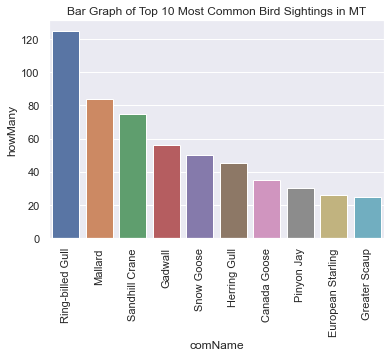

In [16]:
sns.barplot(x = 'comName', y = 'howMany', data = bird_tops)
plt.title("Bar Graph of Top 10 Most Common Bird Sightings in MT")
plt.xticks(rotation=90)

## Wikipedia Pages for Top Bird
Now we want to study up on the top bird spotted in Montana. We will pull Wikipedia pages that reference the most commonly reported bird.


In [17]:
MT_most = MT_df.nlargest(1, 'howMany')
MT_most.comName

67    Ring-billed Gull
Name: comName, dtype: object

In [18]:
MT_most=MT_most.append(comName.values()[0])
MT_most

NameError: name 'comName' is not defined

In [19]:
query = 'Bohemian Waxwing'
 
url = 'https://en.wikipedia.org/w/api.php'
params = {
            'action':'query',
            'format':'json',
            'list':'search',
            'utf8':1,
            'srsearch':query
        }
 
data = requests.get(url, params=params).json()
 
for i in data['query']['search']:
    print(i['title'], ' - Word count: ', i['wordcount'])

Bohemian waxwing  - Word count:  4045
Waxwing  - Word count:  1175
Cedar waxwing  - Word count:  2237
Japanese waxwing  - Word count:  405
Louse  - Word count:  4478
List of birds of Pakistan  - Word count:  8288
National symbols of Ireland, the Republic of Ireland and Northern Ireland  - Word count:  2313
List of birds of Finland  - Word count:  5985
Juniperus scopulorum  - Word count:  1031
List of birds of Pennsylvania  - Word count:  5416
